## TP 2 Ciencia de datos

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis exploratorio de datos

In [332]:
df = pd.read_csv("data_uci.csv", sep = ";")
df.head()


,edad,td,par,col,fcm,riesgo
0,63,1,145,233,150,bajo
1,67,4,160,286,108,alto
2,67,4,120,229,129,alto
3,37,3,130,250,187,bajo
4,41,2,130,204,172,bajo


In [333]:
df.describe()

,edad,td,par,col,fcm
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,3.158416,127.524752,246.693069,145.528053
std,9.038662,0.960126,28.420772,51.776918,32.898676
min,29.000000,1.000000,-1.000000,126.000000,0.000000
25%,48.000000,3.000000,120.000000,211.000000,132.000000
50%,56.000000,3.000000,130.000000,241.000000,152.000000
75%,61.000000,4.000000,140.000000,275.000000,165.000000
max,77.000000,4.000000,200.000000,564.000000,202.000000


#### Variables numéricas

##### Diagramas de caja y bigotes


Text(0.5, 1.0, 'Frecuencia cardíaca máxima')

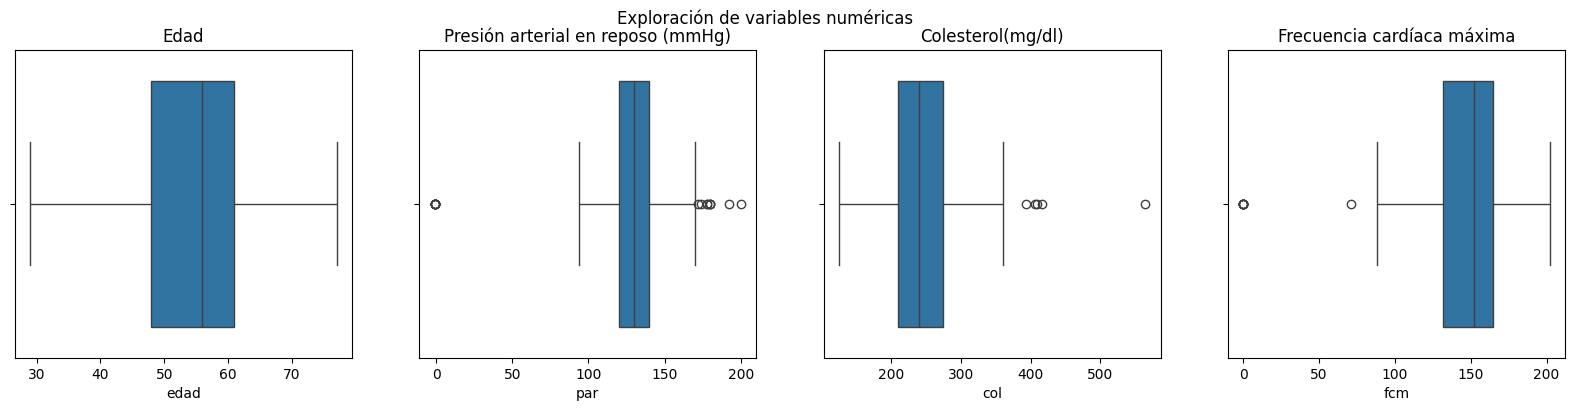

In [334]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 4, figsize=(20, 4))
fig.suptitle("Exploración de variables numéricas")

sns.boxplot(x = df["edad"], ax = ax0)
ax0.set_title("Edad")

sns.boxplot(x = df["par"], ax = ax1)
ax1.set_title("Presión arterial en reposo (mmHg)")

sns.boxplot(x = df["col"], ax = ax2)
ax2.set_title("Colesterol(mg/dl)")

sns.boxplot(x = df["fcm"], ax = ax3)
ax3.set_title("Frecuencia cardíaca máxima")

##### Correlación entre variables

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


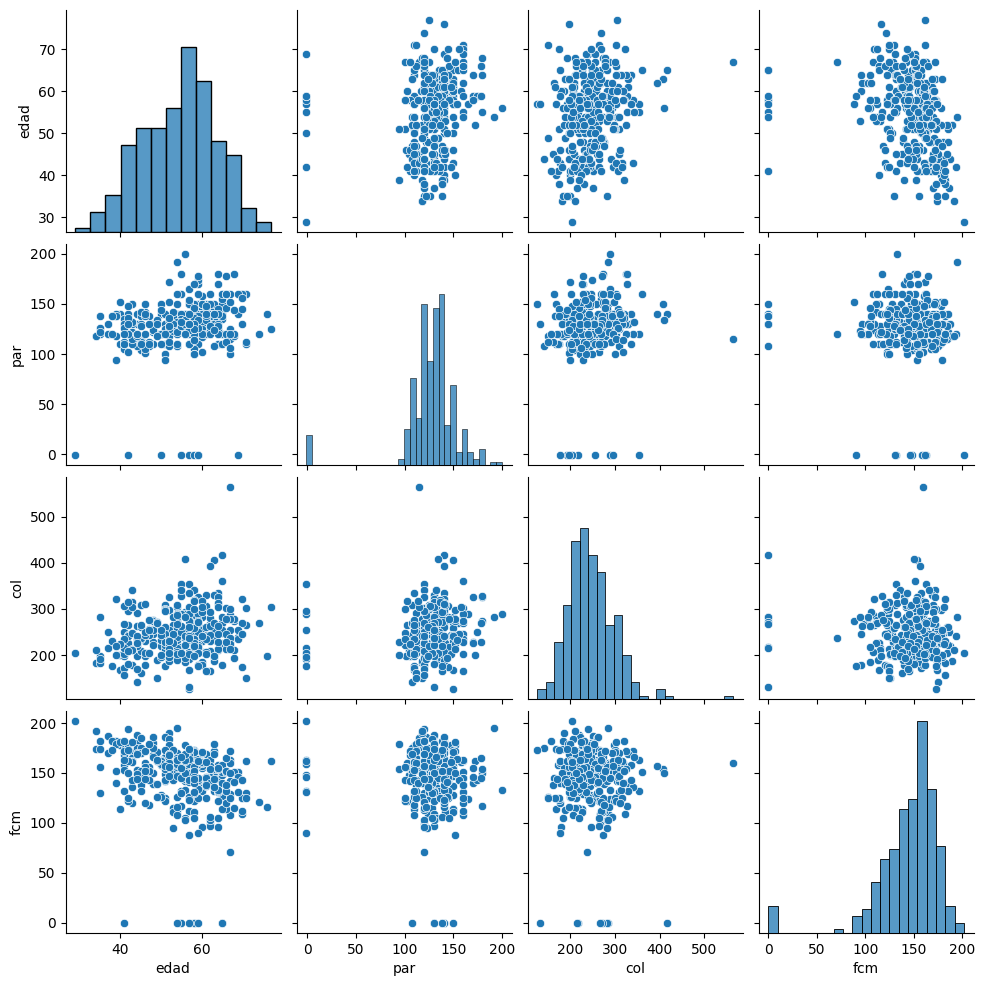

In [335]:
df_num = df[["edad", "par", "col", "fcm"]]
sns.pairplot(df_num)

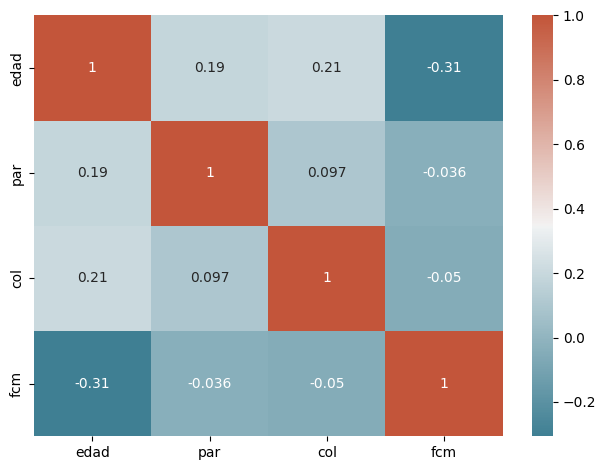

In [336]:
corr = df_num.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True))
plt.tight_layout()

#### Variables categóricas

##### Gráfico de columnas

In [337]:
td_dic = {
    1: "Angina típica",
    2: "Angina atípica",
    3: "Dolor no anginoso",
    4: "Asintomático"
}
df["td_str"] = df["td"].apply(lambda x: td_dic[x])
df.head()

,edad,td,par,col,fcm,riesgo,td_str
0,63,1,145,233,150,bajo,Angina típica
1,67,4,160,286,108,alto,Asintomático
2,67,4,120,229,129,alto,Asintomático
3,37,3,130,250,187,bajo,Dolor no anginoso
4,41,2,130,204,172,bajo,Angina atípica


Text(0.5, 1.0, 'Riesgo de cardiopatía')

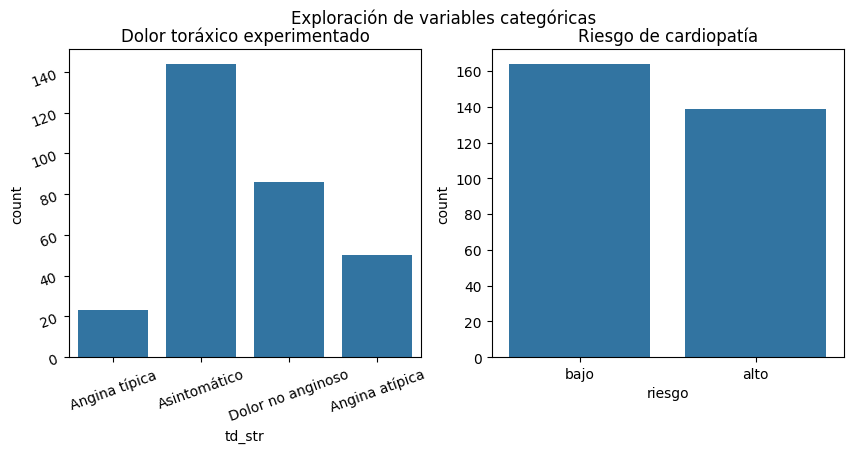

In [338]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))
fig.suptitle("Exploración de variables categóricas")

sns.countplot(x = df["td_str"], ax = ax0)
ax0.set_title("Dolor toráxico experimentado")
ax0.tick_params(labelrotation = 20)

sns.countplot(x = df["riesgo"], ax = ax1)
ax1.set_title("Riesgo de cardiopatía")


### Preprocesamiento del conjunto de datos

In [339]:
# Chequear si hay valores nulos
df.isnull().sum()

edad      0
td        0
par       0
col       0
fcm       0
riesgo    0
td_str    0
dtype: int64

Reemplazamos valores negativos o cero por la media de la columna correspondiente.

In [340]:
# Nos quedamos con todas las filas con valores positivos
filtro_pos = df_num > 0
df_num_pos = df_num[filtro_pos]
df_num_pos.describe()

,edad,par,col,fcm
count,303.000000,294.000000,303.000000,295.000000
mean,54.438944,131.459184,246.693069,149.474576
std,9.038662,17.596056,51.776918,22.800492
min,29.000000,94.000000,126.000000,71.000000
25%,48.000000,120.000000,211.000000,133.500000
50%,56.000000,130.000000,241.000000,152.000000
75%,61.000000,140.000000,275.000000,165.000000
max,77.000000,200.000000,564.000000,202.000000


In [341]:
# Reemplazamos los valores negativos por la media (considerando solo los valores positivos)
df["edad"] = df["edad"].apply(lambda x: df_num_pos["edad"].mean() if x <= 0 else x)
df["par"] = df["par"].apply(lambda x: df_num_pos["par"].mean() if x <= 0 else x)
df["col"] = df["col"].apply(lambda x: df_num_pos["col"].mean() if x <= 0 else x)
df["fcm"] = df["fcm"].apply(lambda x: df_num_pos["fcm"].mean() if x <= 0 else x)

df.describe()

,edad,td,par,col,fcm
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,3.158416,131.459184,246.693069,149.474576
std,9.038662,0.960126,17.331880,51.776918,22.496472
min,29.000000,1.000000,94.000000,126.000000,71.000000
25%,48.000000,3.000000,120.000000,211.000000,136.000000
50%,56.000000,3.000000,130.000000,241.000000,152.000000
75%,61.000000,4.000000,140.000000,275.000000,165.000000
max,77.000000,4.000000,200.000000,564.000000,202.000000


Procesamiento de variables categóricas

In [342]:
# Verificar que los valores de las variables categoricas
print(df["td"].unique())
print(df["riesgo"].unique())

[1 4 3 2]
['bajo' 'alto']


In [343]:
# Cambiar los valores de riesgo a 0 y 1
df["riesgo"] = df["riesgo"].map({"alto": 1, "bajo": 0})
df.head()

,edad,td,par,col,fcm,riesgo,td_str
0,63,1,145.0,233,150.0,0,Angina típica
1,67,4,160.0,286,108.0,1,Asintomático
2,67,4,120.0,229,129.0,1,Asintomático
3,37,3,130.0,250,187.0,0,Dolor no anginoso
4,41,2,130.0,204,172.0,0,Angina atípica


In [344]:
# Aplicar one hot a la columna td_str
df = pd.get_dummies(df, columns = ["td_str"])
df["td_str_Angina atípica"] = df["td_str_Angina atípica"].astype("int")
df["td_str_Angina típica"] = df["td_str_Angina típica"].astype("int")
df["td_str_Asintomático"] = df["td_str_Asintomático"].astype("int")
df["td_str_Dolor no anginoso"] = df["td_str_Dolor no anginoso"].astype("int")

# Y eliminamos la columna td
df.drop(columns = ["td"], inplace=True)

df.head()

,edad,par,col,fcm,riesgo,td_str_Angina atípica,td_str_Angina típica,td_str_Asintomático,td_str_Dolor no anginoso
0,63,145.0,233,150.0,0,0,1,0,0
1,67,160.0,286,108.0,1,0,0,1,0
2,67,120.0,229,129.0,1,0,0,1,0
3,37,130.0,250,187.0,0,0,0,0,1
4,41,130.0,204,172.0,0,1,0,0,0


Balance del conjunto de datos

In [345]:
# Seleccionar las columnas del dataset que corresponden a las entradas del modelo y la salida esperada.
X = df[["edad", "par", "col", "fcm", "td_str_Angina atípica", "td_str_Angina típica", "td_str_Asintomático", "td_str_Dolor no anginoso"]]
y = df["riesgo"]

In [346]:
# Importar el paquete imblearn
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [347]:
# Generar un nuevos conjunto de datos balanceado por Over-sampling
# Se define la estrategia de Oversampling, la clase minoritaria tendrá la misma cantidad que la mayoritaria.
oversample = RandomOverSampler(sampling_strategy='minority')

In [348]:
# Se genera el nuevo dataset balanceado
X_over, y_over = oversample.fit_resample(X, y)

<Axes: xlabel='riesgo', ylabel='count'>

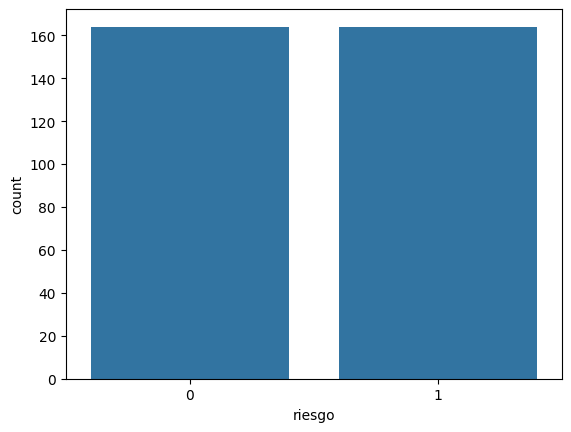

In [349]:
# Se visualiza el balance del dataset generado
sns.countplot(x=y_over)

Normalización del conjunto de datos

<Axes: >

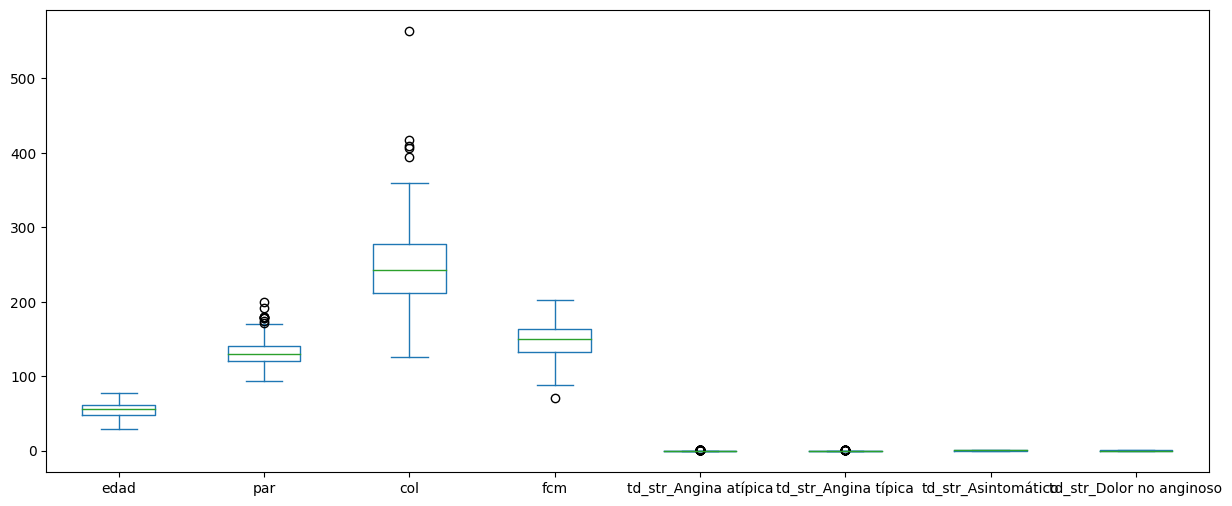

In [350]:
# Visualizamos la distribución de las distintas variables previo a normalizar
fig, ax = plt.subplots(figsize=(15,6))
X_over.plot(kind='box', ax=ax)

In [351]:
# Copiar las variables
X_normalizada = X_over.copy()
  
# Aplicamos normalización a las columnas numéricas (no dummies)
columns = ["edad", "par", "col", "fcm"]
for column in columns:
  X_normalizada[column] = (X_normalizada[column] - X_normalizada[column].min()) / (X_normalizada[column].max() - X_normalizada[column].min())    


<Axes: >

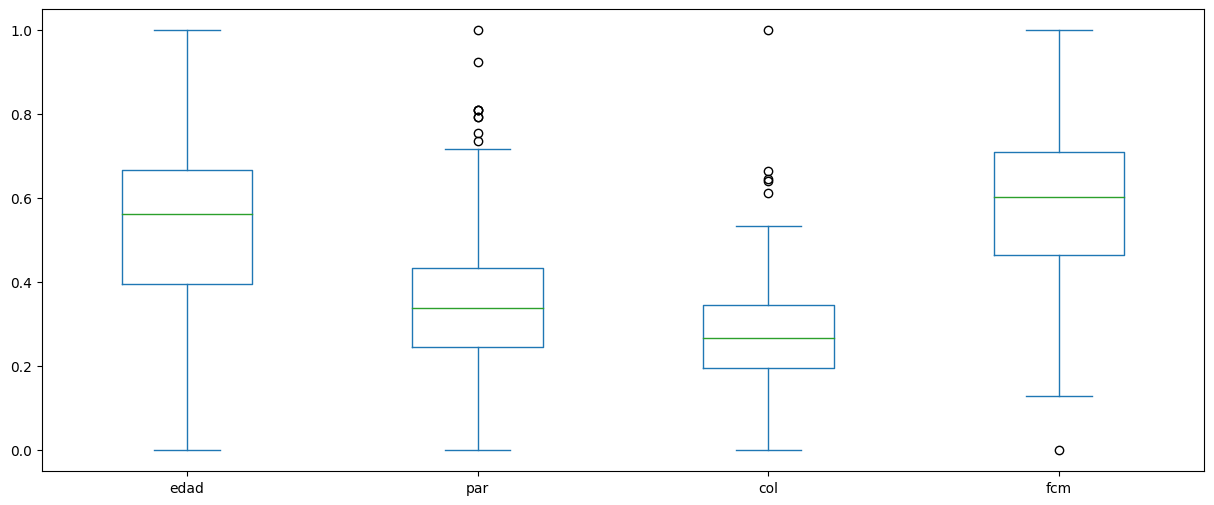

In [352]:
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
X_normalizada.loc[:,columns].plot(kind='box', ax=ax)

### Entrenamiento de modelos de clasificación

In [353]:
# Funcion para calcular el accuracy y F1-score de los modelos
from sklearn.metrics import accuracy_score, f1_score
def evaluar_modelo(modelo, x, y):
    X_prediction = modelo.predict(x)
    train_accuracy = accuracy_score(X_prediction, y)
    train_f1 = f1_score(X_prediction, y)
    print('Accuracy para los datos: ', train_accuracy)
    print('F1-Score para los datos: ', train_f1)

División del conjunto de datos en entrenamiento y prueba

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
# Separar el conjunto de datos en una particion para entrenamiento y una para test con el 20% del conjunto.
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=183)

In [356]:
# (DATOS NORMALIZADOS) Separar el conjunto de datos en una particion para entrenamiento y una para test con el 20% del conjunto.
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalizada, y_over, test_size=0.2, random_state=183)

In [357]:
# Visualizar el resultado de la función (shape)
print("Conjunto original (balanceado): ", X_over.shape, " - Target original (balanceado): ", y_over.shape)
print("Conjunto de entrenamiento: ", X_train.shape, " - Target entrenamiento: ", y_train.shape)
print("Conjunto de prueba: ", X_test.shape, " - Target de prueba: ", y_test.shape)

Conjunto original (balanceado):  (328, 8)  - Target original (balanceado):  (328,)
Conjunto de entrenamiento:  (262, 8)  - Target entrenamiento:  (262,)
Conjunto de prueba:  (66, 8)  - Target de prueba:  (66,)


##### Regresión logística

In [358]:
# Importar el paquete de sklearn para el modelo de regresión logística
from sklearn.linear_model import LogisticRegression

In [359]:
# Instanciar un modelo de Regresión Logística
model_LR = LogisticRegression(verbose=2, max_iter=500, C=1) # <150 iteraciones no converge

Entrenamiento (datos sin normalizar)

In [360]:
# Entrenamiento del modelo con el conjunto de entrenamiento
model_LR.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=500, verbose=2)

In [361]:
# Calculo de la precisión para el conjunto de entrenamiento
evaluar_modelo(model_LR, X_train, y_train)

Accuracy para los datos:  0.7824427480916031
F1-Score para los datos:  0.7865168539325842


Prueba (datos sin normalizar)

In [362]:
# Calculo de la precisión para el conjunto de prueba
evaluar_modelo(model_LR, X_test, y_test)

Accuracy para los datos:  0.7424242424242424
F1-Score para los datos:  0.7384615384615385


Entrenamiento (datos normalizados)

In [363]:
# (DATOS NORMALIZADOS) Entrenamiento del modelo con el conjunto de entrenamiento 
model_LR.fit(X_train_norm, y_train_norm)

LogisticRegression(C=1, max_iter=500, verbose=2)

In [364]:
# (DATOS NORMALIZADOS) Calculo de la precisión para el conjunto de entrenamiento
evaluar_modelo(model_LR, X_train_norm, y_train_norm)

Accuracy para los datos:  0.7748091603053435
F1-Score para los datos:  0.7756653992395437


Prueba (datos normalizados)

In [365]:
# (DATOS NORMALIZADOS) Calculando de la precisión para el conjunto de prueba
evaluar_modelo(model_LR, X_test_norm, y_test_norm)

Accuracy para los datos:  0.7727272727272727
F1-Score para los datos:  0.7761194029850745


##### Naive Bayes

In [366]:
# Importar el paquete de sklearn para el modelo de Naive Bayes (GaussianNB - modelos continuos)
from sklearn.naive_bayes import GaussianNB

In [367]:
# Instanciamos un modelo Naive Bayes
model_NB = GaussianNB()

Entrenamiento (datos sin normalizar)

In [368]:
# Entrenar el modelo con el conjunto de entrenamiento
model_NB.fit(X_train, y_train)

GaussianNB()

In [369]:
# Calculo de la precisión para el conjunto de entrenamiento
evaluar_modelo(model_NB, X_train, y_train)

Accuracy para los datos:  0.7709923664122137
F1-Score para los datos:  0.7727272727272727


Prueba (datos sin normalizar)

In [370]:
# Calculando de la precisión para el conjunto de prueba
evaluar_modelo(model_NB, X_test, y_test)

Accuracy para los datos:  0.7727272727272727
F1-Score para los datos:  0.7761194029850745


Entrenamiento (datos normalizados)

In [371]:
# (DATOS NORMALIZADOS) Entrenar el modelo con el conjunto de entrenamiento
model_NB.fit(X_train_norm, y_train_norm)

GaussianNB()

In [372]:
# (DATOS NORMALIZADOS) Calculo de la precisión para el conjunto de entrenamiento
evaluar_modelo(model_NB, X_train_norm, y_train_norm)

Accuracy para los datos:  0.7709923664122137
F1-Score para los datos:  0.7727272727272727


Prueba (datos normalizados)

In [373]:
# (DATOS NORMALIZADOS) Calculando de la precisión para el conjunto de prueba
evaluar_modelo(model_NB, X_test_norm, y_test_norm)

Accuracy para los datos:  0.7727272727272727
F1-Score para los datos:  0.7761194029850745


##### K Nearest Neighbors

In [374]:
# Importar el paquete de sklearn para el modelo de KNN 
from sklearn.neighbors import KNeighborsClassifier

In [375]:
# Instanciamos un modelo KNN
model_KNN = KNeighborsClassifier(n_neighbors=5) # A mayor numero de vecinos, mas simple es el modelo

Entrenamiento (datos sin normalizar)

In [376]:
# Entrenar el modelo con el conjunto de entrenamiento
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [377]:
# Calculando la precisión para el conjunto de entrenamiento
evaluar_modelo(model_KNN, X_train, y_train)

Accuracy para los datos:  0.7709923664122137
F1-Score para los datos:  0.7692307692307693


Prueba (datos sin normalizar)

In [378]:
# Calculando de la precisión para el conjunto de prueba
evaluar_modelo(model_KNN, X_test, y_test)

Accuracy para los datos:  0.6060606060606061
F1-Score para los datos:  0.6388888888888888


Entrenamiento (datos normalizados)

In [379]:
# (DATOS NORMALIZADOS) Entrenar el modelo con el conjunto de entrenamiento
model_KNN.fit(X_train_norm, y_train_norm)

KNeighborsClassifier()

In [380]:
# (DATOS NORMALIZADOS) Calculo de la precisión para el conjunto de entrenamiento
evaluar_modelo(model_KNN, X_train_norm, y_train_norm)

Accuracy para los datos:  0.8015267175572519
F1-Score para los datos:  0.7984496124031009


Prueba (datos normalizados)

In [381]:
# (DATOS NORMALIZADOS) Calculando de la precisión para el conjunto de prueba
evaluar_modelo(model_KNN, X_test_norm, y_test_norm)

Accuracy para los datos:  0.7272727272727273
F1-Score para los datos:  0.7272727272727272


##### MLP Classifier

In [382]:
from sklearn.neural_network import MLPClassifier

In [383]:
# Instanciamos un modelo MLP
model_MLP = MLPClassifier(max_iter=500)

Entrenamiento (datos sin normalizar)

In [384]:
# Entrenar el modelo con el conjunto de entrenamiento
model_MLP.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [385]:
# Calculando la precisión para el conjunto de entrenamiento
evaluar_modelo(model_MLP, X_train, y_train)

Accuracy para los datos:  0.7290076335877863
F1-Score para los datos:  0.7560137457044673


Prueba (datos sin normalizar)

In [386]:
# Calculando de la precisión para el conjunto de prueba
evaluar_modelo(model_MLP, X_test, y_test)

Accuracy para los datos:  0.7272727272727273
F1-Score para los datos:  0.7499999999999999


Entrenamiento (datos normalizados)

In [387]:
# (DATOS NORMALIZADOS) Entrenar el modelo con el conjunto de entrenamiento
model_MLP.fit(X_train_norm, y_train_norm)

MLPClassifier(max_iter=500)

In [388]:
# (DATOS NORMALIZADOS) Calculo de la precisión para el conjunto de entrenamiento
evaluar_modelo(model_MLP, X_train_norm, y_train_norm)

Accuracy para los datos:  0.7824427480916031
F1-Score para los datos:  0.7849056603773585


Prueba (datos normalizados)

In [389]:
# (DATOS NORMALIZADOS) Calculando de la precisión para el conjunto de prueba
evaluar_modelo(model_MLP, X_test_norm, y_test_norm)

Accuracy para los datos:  0.7424242424242424
F1-Score para los datos:  0.7384615384615385
